<a href="https://colab.research.google.com/github/joymuli10/Hass_Realestate_Price_Prediction/blob/master/Hass_Consulting_Realestate_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Question

## a). Specifying the question



> I work for Hass Consulting Company which is a real estate leader with over 25 years of experience as the Data Scientist. I have been tasked to study the factors that affect housing prices using information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 



## b). Defining the metric for success



> This project will be considered a success when we are able to develop a reliable prediction model that has a low mean score error.



## c). Understanding the context



> Hass Consulting is a real estate company that deals in sellings houses. The prices of real estate are affected by location, number of bedrooms, bathrooms, pools, size of the house, size of the compound among others.

> Given these features I'd like to develop a few models i.e Multilinear, Quantile, Lasso, Ridge and Elastic Net Regression Models to get the features that greatly predict the price of a house.





## d). Recording the experimental design

Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:



1.   Load data and preview data
2.   Data Cleaning
3.   Exploratory Analysis
4.   Implementing the Solution
5.   Challenging the Solution
6.   Follow Up Question



# Reading the data

Importing the common libraries used.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
#Loading our real estate dataset
df_real = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

# Checking the data

In [115]:
#Previewing the head
df_real.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [116]:
#Previewing the tail
df_real.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [117]:
#Checking the number of rows and columns
print('real estate dataset shape: {} Rows, {} Columns'.format(*df_real.shape))

real estate dataset shape: 21613 Rows, 20 Columns


In [118]:
#Checking the info
df_real.info

<bound method DataFrame.info of                id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0      7129300520  221900.0         3  ... -122.257           1340        5650
1      6414100192  538000.0         3  ... -122.319           1690        7639
2      5631500400  180000.0         2  ... -122.233           2720        8062
3      2487200875  604000.0         4  ... -122.393           1360        5000
4      1954400510  510000.0         3  ... -122.045           1800        7503
...           ...       ...       ...  ...      ...            ...         ...
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[21613 rows x 20 co

# Tidying the dataset

In [119]:
#Dropping any duplicates
df_real = df_real.drop_duplicates()

In [120]:
#Checking if there are any null values
df_real.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64



> There are no null values.



In [121]:
#Checking the various data types
df_real.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [122]:
#Dropping unnecesarry columns
# I assumed that somebody's ID doesn't impact the houses prices so I'll drop it first
df_real = df_real.drop(['id', 'sqft_living15', 'sqft_lot15'], axis=1)

# Exploratory Analysis

##  Univariate analysis

In [126]:
df_real['bedrooms'].value_counts()

3     9822
4     6881
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

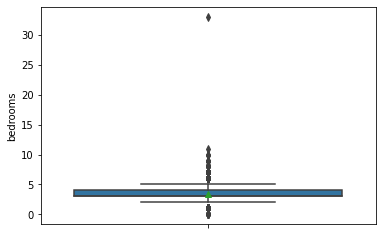

In [127]:
#Plotting a boxplot
sns.boxplot(df_real["bedrooms"], showmeans=True, orient='vert')

#'bedrooms' has a few outliers

In [128]:
df_real['waterfront'].value_counts()

0    21447
1      163
Name: waterfront, dtype: int64

In [129]:
df_real['condition'].unique()

array([3, 5, 4, 1, 2])

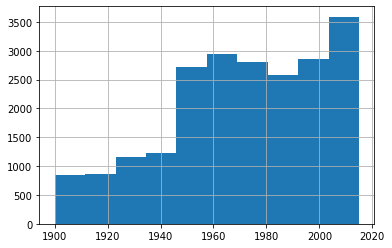

In [130]:
##Plot a histogram(numerical variables)

df_real['yr_built'].hist()

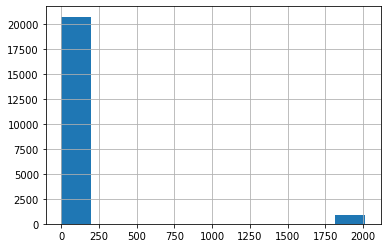

In [131]:
##Plot a histogram(numerical variables)

df_real['yr_renovated'].hist()

Text(0, 0.5, 'Count')

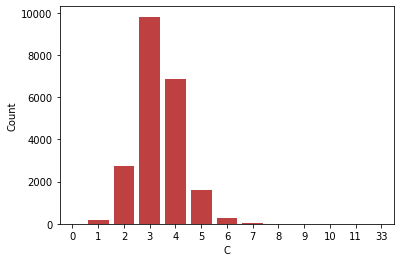

In [132]:
sns.countplot(df_real['bedrooms'], color='red',saturation=0.5)
plt.xlabel('C')
plt.ylabel('Count')

## Bivariate Analysis

In [133]:
df_real.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [134]:
df1 = df_real[['price', 'bedrooms', 'sqft_living']]

In [135]:
# Previewing the statistical details of the dataset
# 
df_real.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


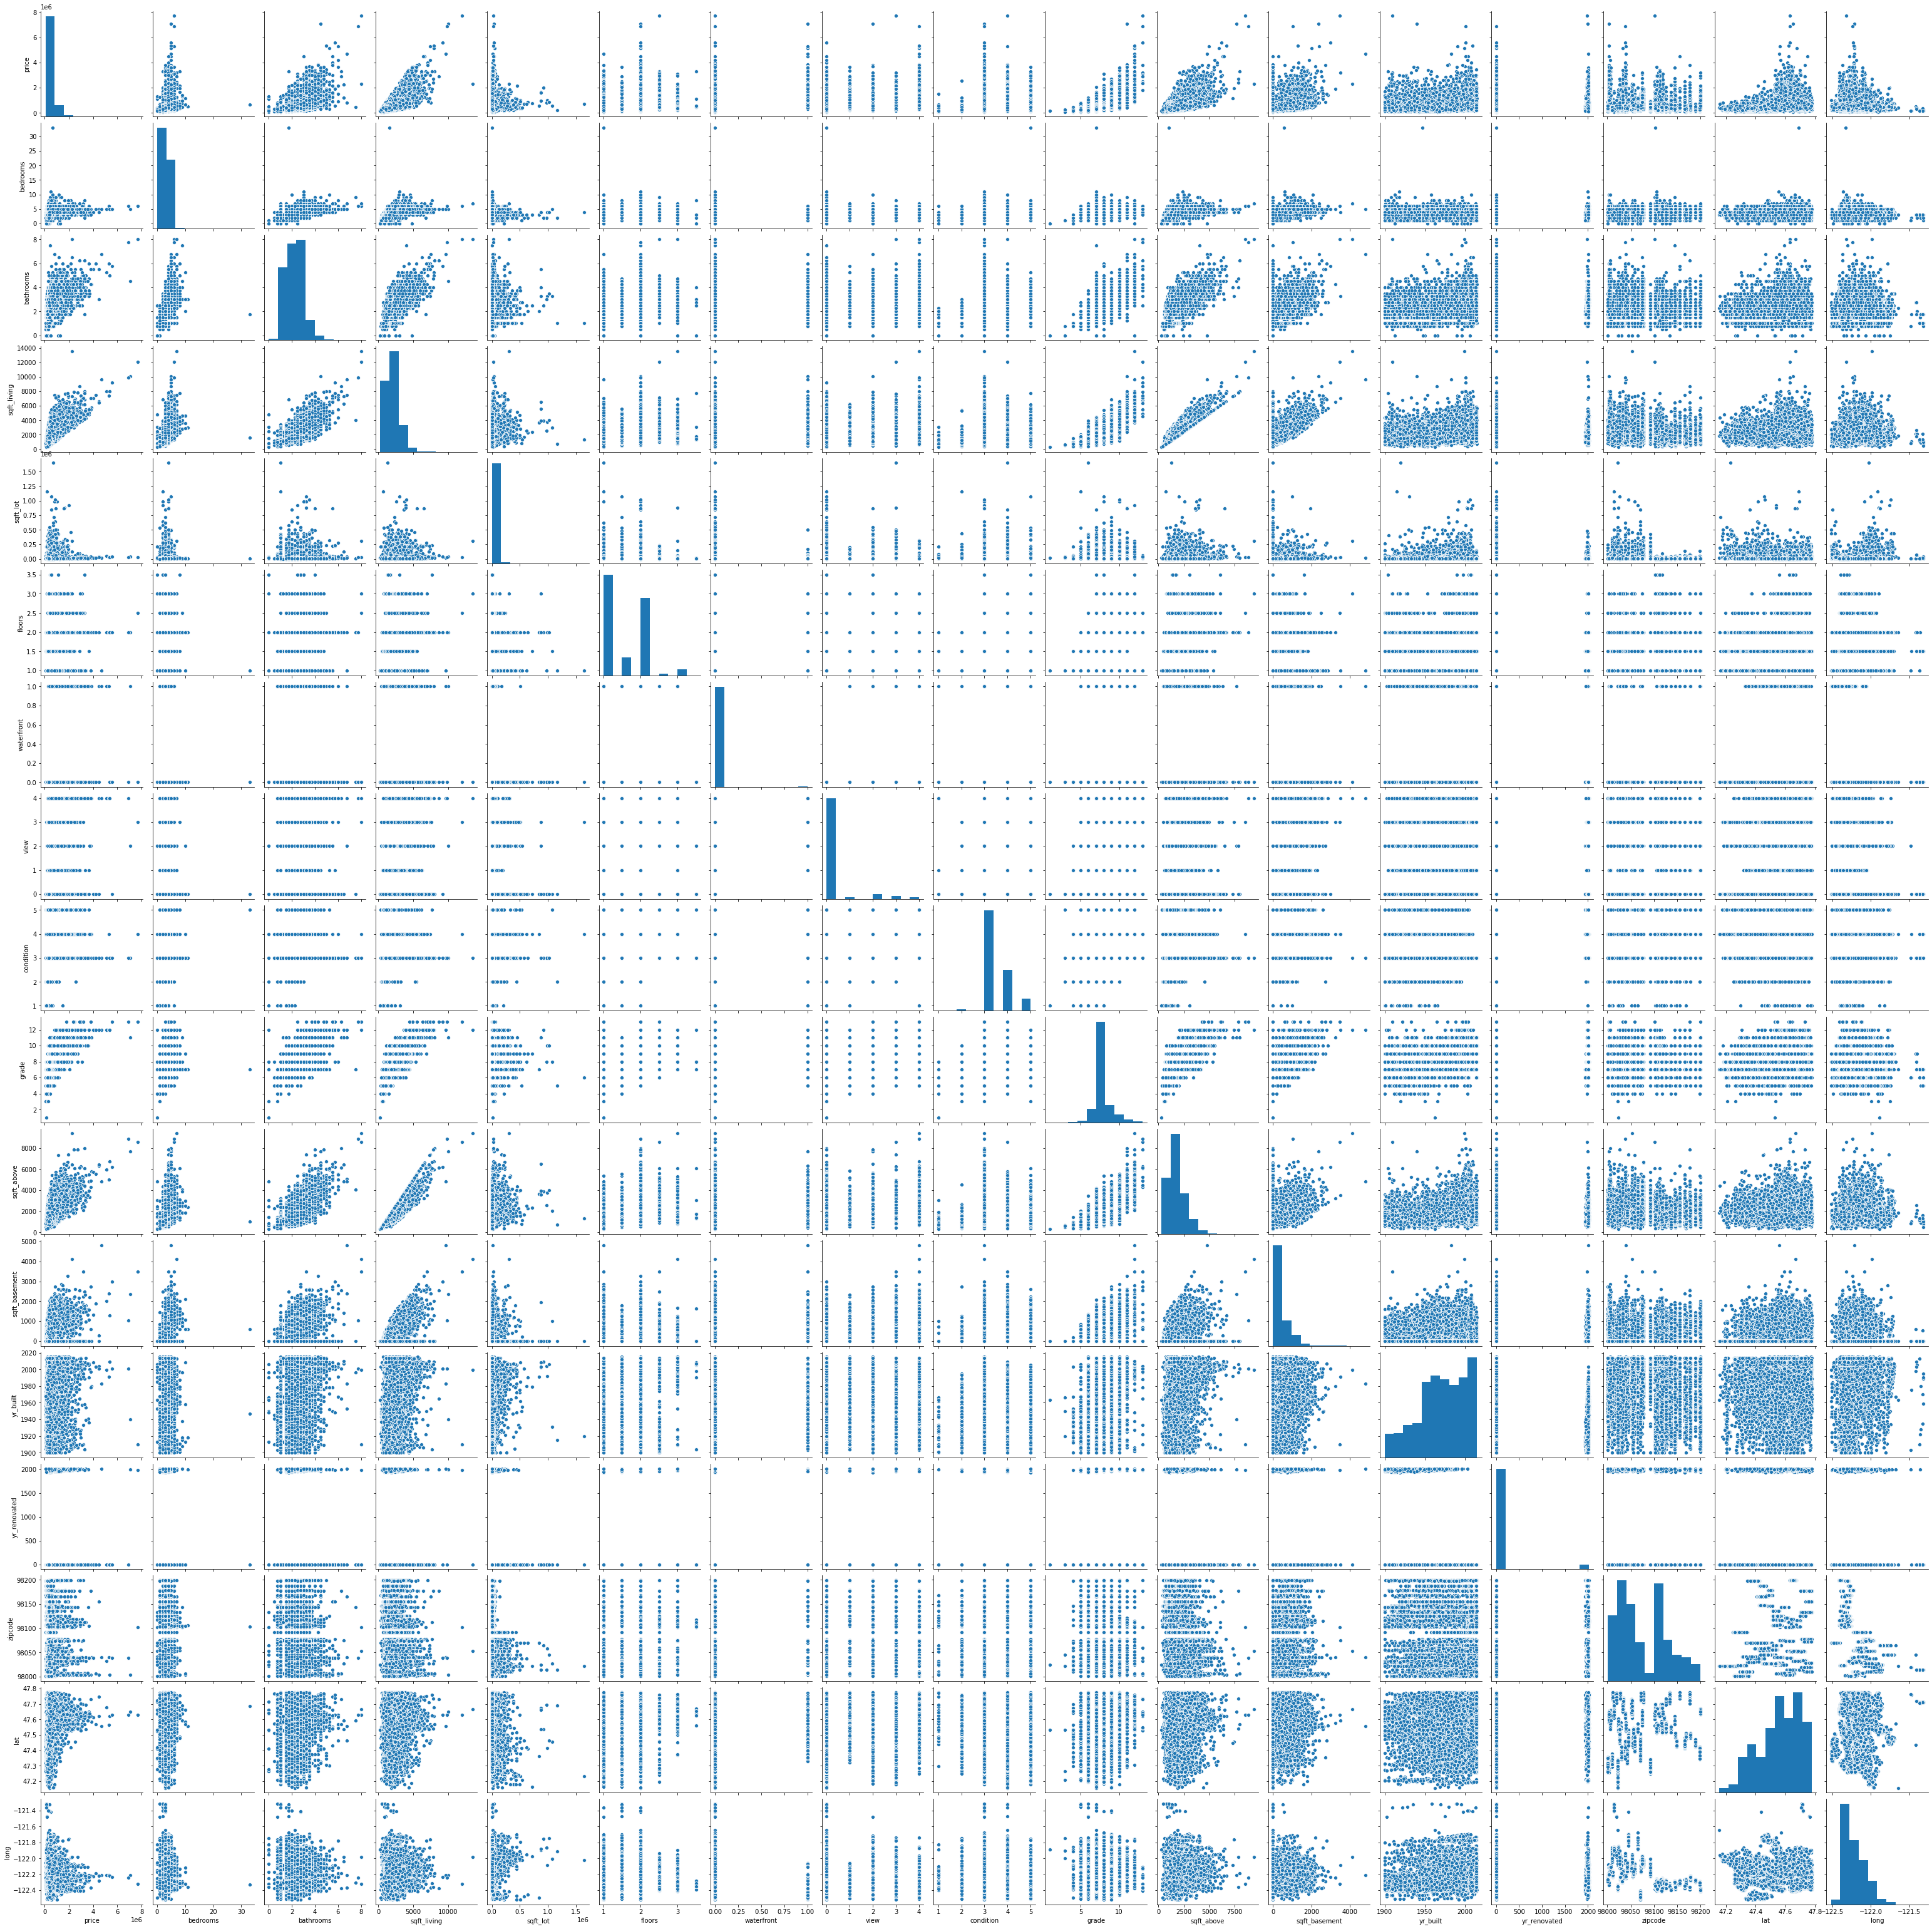

In [136]:
sns.pairplot(df_real)
plt.show()

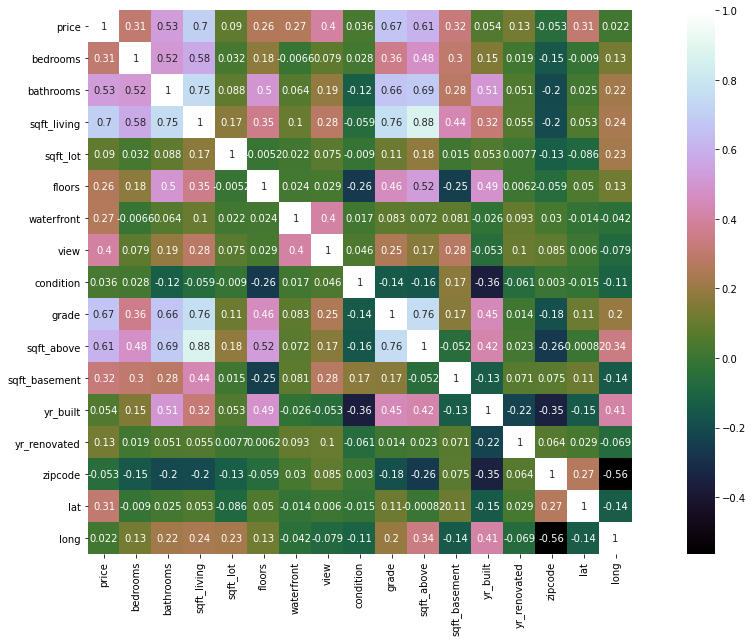

In [137]:
corr_mat=df_real.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [184]:
#Price against year built
df_real[['price', 'yr_built']].corr()

,price,yr_built
price,1.00000,0.05398
yr_built,0.05398,1.00000


## Multivariate Analysis

In [138]:
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_real)
chi_square_value, p_value

(794543.2647686566, 0.0)

In [139]:
#Using Factor Analysis to get top 4 factors
#Note, factors obtained must not have the least correlation to the dependent variable

# Creating factor analysis object and perform factor 
from factor_analyzer import FactorAnalyzer
factor = FactorAnalyzer()
factor.analyze(df_real,11, rotation=None)

# Checking the Eigenvalues
ev, v = factor.get_eigenvalues()
ev
# 4-factors eigenvalues > 1

,Original_Eigenvalues
0,5.000049e+00
1,2.390731e+00
2,1.523370e+00
3,1.293998e+00
4,1.027817e+00
5,9.861958e-01
6,8.750223e-01
7,8.288860e-01
8,6.302221e-01
9,5.582203e-01


In [140]:
factor = FactorAnalyzer()
df2 = df_real.drop(columns=['price'])
factor.analyze(df2, 4, rotation="varimax")
factor.loadings

,Factor1,Factor2,Factor3,Factor4
bedrooms,0.614176,-0.099612,0.057853,-0.039600
bathrooms,0.802132,0.240925,0.084003,0.081321
sqft_living,0.977157,0.009641,0.107171,0.182641
sqft_lot,0.105577,-0.013394,0.239760,0.079508
floors,0.366220,0.693618,-0.060797,0.012394
waterfront,0.007620,0.014711,0.029564,0.509240
view,0.167514,-0.071007,-0.007144,0.778471
condition,-0.046436,-0.406469,-0.013808,0.028911
grade,0.731106,0.314897,0.069016,0.181671
sqft_above,0.763673,0.386793,0.205830,0.106804


The highest in Factor 1 is sqft_living and bathrooms. The highest in factor 2 is floors and yr_built. The highest in factor 3 is long while the highest in factor 4 is view and waterfront. I also think that bedrooms also affect the price of a house so I'll add it in.

In [141]:

df_estate = df_real[['price', 'sqft_living', 'bathrooms', 'floors', 'yr_built', 'view', 'waterfront', 'bedrooms']]
df_estate.head()

,price,sqft_living,bathrooms,floors,yr_built,view,waterfront,bedrooms
0,221900.0,1180,1.00,1.0,1955,0,0,3
1,538000.0,2570,2.25,2.0,1951,0,0,3
2,180000.0,770,1.00,1.0,1933,0,0,2
3,604000.0,1960,3.00,1.0,1965,0,0,4
4,510000.0,1680,2.00,1.0,1987,0,0,3


# Regression Analysis

## Multiple Linear Regression

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Preparing the data
# X = df_estate['price'].drop
# y = df_estate['price']

X = df_estate.drop("price",axis=1)
y = df_estate["price"]

In [143]:
# Dividing our data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
#Finding the most optimal coefficients for all the attributes
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
sqft_living,272.344554
bathrooms,58974.608063
floors,55888.408415
yr_built,-2922.090267
view,59303.218946
waterfront,601173.166946
bedrooms,-54456.752574


R Squared score is 0.6


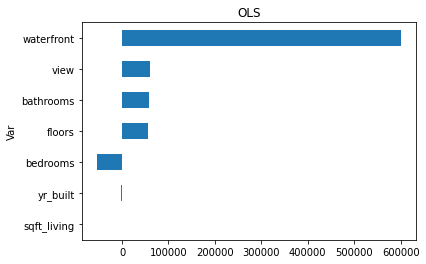

In [146]:
# Model Evaluation for testing set
y_test_predict = lin_reg.predict(X_test)
r2 = metrics.r2_score(y_test, y_test_predict).round(2)
print('R Squared score is {}'.format(r2) )

# Plot the coefficients in descending order
w = pd.DataFrame()
w['Var'] = X_train.columns
w = w.set_index('Var') # Set the variable names as the index
w['beta'] = lin_reg.coef_
w['beta_abs'] = np.abs(w['beta']) # Get the absolute value for ranking
w = w.sort_values(by='beta_abs')
w['beta'].plot.barh()
plt.title('OLS')
plt.show()



> All the coefficients were positive except for bedrooms. 



In [145]:
# Making Predictions
y_pred = lin_reg.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
9790,680200.0,557398.774656
10280,550000.0,494147.245887
21572,230000.0,166159.861608
20060,379950.0,556825.248189
21204,1060000.0,689258.793534
...,...,...
17762,300000.0,290616.908858
13211,395000.0,599362.756677
8108,395000.0,589808.168955
19728,489000.0,396630.367737




> The model has slightly under predicted the price.



In [147]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# We can see that the value of root mean squared error is 68.31, 
# which is slightly greater than 10% of the mean value of the gas consumption in all states(576.66). 
# This means that our algorithm was not very accurate but can still make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Mean Squared Error: 52091014522.013466


In [148]:
df_estate.describe()

,price,sqft_living,bathrooms,floors,yr_built,view,waterfront,bedrooms
count,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,2079.881212,2.114739,1.494239,1971.003609,0.234197,0.007543,3.370847
std,3.673876e+05,918.500299,0.770204,0.539994,29.372639,0.766136,0.086523,0.930110
min,7.500000e+04,290.000000,0.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,3.216125e+05,1425.500000,1.750000,1.000000,1951.000000,0.000000,0.000000,3.000000
50%,4.500000e+05,1910.000000,2.250000,1.500000,1975.000000,0.000000,0.000000,3.000000
75%,6.450000e+05,2550.000000,2.500000,2.000000,1997.000000,0.000000,0.000000,4.000000
max,7.700000e+06,13540.000000,8.000000,3.500000,2015.000000,4.000000,1.000000,33.000000




> The Multiple Linear Regression had a R Squared of 0.6 which shows that model generally performed well. 


> Coefficient
sqft_living	272.344554
bathrooms	58974.608063
floors	55888.408415
yr_built	-2922.090267
view	59303.218946
waterfront	601173.166946
bedrooms	-54456.752574

All the coefficients were positive except for year built and number of bedrooms. The sqft_living coefficient meant that for every additional sqft_living, price went up by 272.34. The bathrooms coefficient shows that for every additional bathroom, price went up by 58975. The negative bedroom coefficient did not make any sense hence my assumption to add it on the features from Factor Analysis was wrong.


> It had a Mean Squared Error: 52091014522.013466







## Quantile Regression

In [187]:
from sklearn import preprocessing
#Preprocessing
X = df_estate.drop("price",axis=1)
Y = df_estate["price"]

In [188]:
import statsmodels.regression.quantile_regression as Q_reg
import matplotlib.pyplot as plt

quantiles = [0.25, 0.5, 0.75]

# Get the model, and the cofficients in (a) - (b)
def Qreg(q):
   # (a) Modeling 
   mod = Q_reg.QuantReg(Y_train, X_train).fit(q=q)
    
   # (b) Get the coefficients and the lower and upper bounds
   coefs = pd.DataFrame()
   coefs['param'] = mod.params
   coefs = pd.concat([coefs,mod.conf_int()],axis=1) 
   coefs['q'] = q
   coefs.columns = ['coef','beta_lower','beta_upper','quantile']
    
   return coefs

   Qreg_coefs = pd.DataFrame()
for q in quantiles:
    coefs = Qreg(q)
    Qreg_coefs = pd.concat([Qreg_coefs,coefs])

# Get the R-squared for Q=0.5
q = 0.5
Y_test_pred1 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.25).predict(X_test)
Y_test_pred2 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.5).predict(X_test)
Y_test_pred3 = Q_reg.QuantReg(Y_train, X_train).fit(q=0.75).predict(X_test)
r2 = metrics.r2_score(Y_test,Y_test_pred2)
print('R2 score for the 50th percentile is {}'.format(r2) ) 

R2 score for the 50th percentile is 0.5534605770268566


In [153]:
print("The mean squared error for the quantile model:",metrics.mean_squared_error(Y_test, Y_test_pred2))

The mean squared error for the quantile model: 58812621822.65331


In [154]:
# Making Predictions
# To compare the actual output, linear, 50th, 25th and the 75th quantile 
comparison = pd.DataFrame({'Actual': Y_test,'Linear': y_test_predict,'50th Quantile': Y_test_pred2,'25th Quantile':Y_test_pred1,'75th Quantile':Y_test_pred3})
comparison.describe()

,Actual,Linear,50th Quantile,25th Quantile,75th Quantile
count,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03,4.322000e+03
mean,5.390960e+05,5.390574e+05,5.073657e+05,3.828399e+05,6.402553e+05
std,3.629574e+05,2.797307e+05,2.276675e+05,1.683029e+05,2.792201e+05
min,8.400000e+04,6.893135e+04,1.683100e+05,1.250279e+05,2.429964e+05
25%,3.200000e+05,3.503754e+05,3.581017e+05,2.702141e+05,4.567853e+05
50%,4.530000e+05,4.806222e+05,4.547392e+05,3.453621e+05,5.748329e+05
75%,6.450000e+05,6.621200e+05,6.052488e+05,4.573667e+05,7.562906e+05
max,6.890000e+06,3.450848e+06,2.827536e+06,1.990295e+06,3.613702e+06


In [191]:
#Getting the coefficients for our model
print(coefs)

                      coef     beta_lower     beta_upper  quantile
sqft_living     271.840633     264.358179     279.323086      0.75
bathrooms    -11743.936904  -20706.938355   -2780.935454      0.75
floors        27374.711571   18572.488445   36176.934696      0.75
yr_built         74.725689      65.108143      84.343234      0.75
view          93644.527103   87869.889100   99419.165105      0.75
waterfront   692008.763056  643925.352171  740092.173941      0.75
bedrooms     -33942.575552  -39786.966149  -28098.184956      0.75


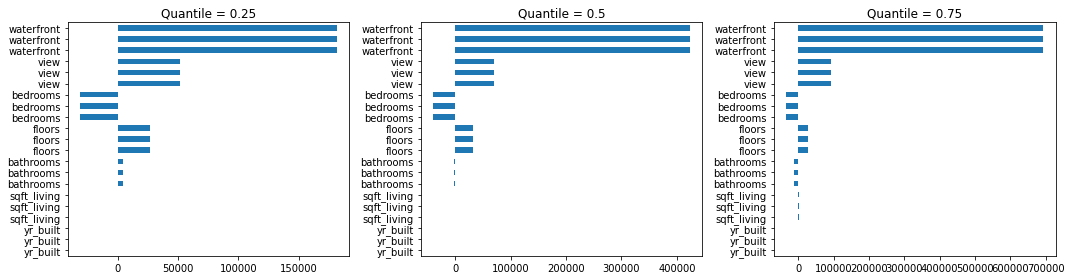

In [158]:
# Get the absolute value of the coefficients for ranking
Qreg_coefs['coef_abs'] = np.abs(Qreg_coefs['coef'] ) 
Qreg_coefs = Qreg_coefs.sort_values(by=['quantile','coef_abs'])

fig = plt.figure(figsize=(15, 4))

n = len(quantiles)

for i in range(n):
    plt.subplot(1, n, i+1)
    w = Qreg_coefs[Qreg_coefs['quantile']==quantiles[i]]
    w['coef'].plot.barh()
    plt.title('Quantile = ' + str(quantiles[i] ))

fig.tight_layout()
plt.show()



> The model has a R Squared score of the 50%th percentile is 0.55. This shows that the model performed moderately well.

> The mean squared error for the quantile model: 58812621822.65 this is a bit higher than the MSE that we got on multilinear regression: 52091014522.01. This means that Multiple Linear Regression performed better that Quantile Regression. 





## Ridge Regression

In [161]:
# Setting up our X and y datasets
X = df_estate.drop("price",axis=1)
y = df_estate["price"]

In [162]:
#baseline regression model
from sklearn import metrics

regression = LinearRegression()
regression.fit(X,y)

y_pred = regression.predict(X)

first_model = metrics.mean_squared_error(y, y_pred)
print(first_model)

54534297012.00984


In [163]:
#Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.05, normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [164]:
#Fitting our data to ridge regression model

search.fit(X,y)
search.best_params_
{'alpha': 0.05}
abs(search.best_score_) 

54921509960.987724

In [165]:
#Fitting with the best parameters

ridge = Ridge(normalize=True,alpha=0.05)
ridge.fit(X,y)

y_pred=ridge.predict(X)

second_model = (mean_squared_error(y,y_pred))
print(second_model)

54864223117.5248


In [166]:
#Checking coefficients in regression

coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,df_estate.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 58121.99884536157,
 'floors': -2981.9963457708,
 'price': 272.92774415450305,
 'sqft_living': 61094.67645536026,
 'view': 546029.3934020939,
 'waterfront': -54658.38968572764,
 'yr_built': 59116.93782671148}

In [167]:
#Coeffs in ridge

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,df_estate.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 54734.64572626778,
 'floors': -2712.4394064379007,
 'price': 243.93837538584816,
 'sqft_living': 70589.19120197868,
 'view': 532502.436712111,
 'waterfront': -41429.01005935053,
 'yr_built': 63975.762720268795}



> The baseline model's MSE is 54534297012.01 while the Lasso Regression MSE is 54864223117.52 showing that the baseline model (Linear Regression) performed better than Ridge Regression

> Also, the coefficients in ridge show that they are lesser than those of the liner regression model. 





## Lasso Regression

In [168]:
# Setting up our X and y datasets
X = df_estate.drop("price",axis=1)
y = df_estate["price"]

In [169]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [170]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [171]:
# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.5959446477414111
lasso MSE: 54534297022.554756
lasso coef: [250677.11525407  47052.21278435  31383.51685345 -87584.43438849
  45290.55798117  47242.48981715 -50834.50584564]


In [172]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 
# For that, we have to define the set of parameters for GridSearch. 
# In this case, a model with the highest R-squared score will give us the best parameters.
# 

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#Base model
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [173]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6011948310641329
linear score: 0.6011993391967638
lasso MSE: 54234316379.35559
linear MSE: 54233703309.339386
lasso best estimator coef: [252236.06654562  44925.25350355  31988.78677716 -86374.81637123
  46382.00999037  42731.66744825 -51655.58286515]
linear coef: [252268.02333961  44973.89036459  32018.93666695 -86438.55420759
  46382.81549928  42743.80190929 -51717.19486538]


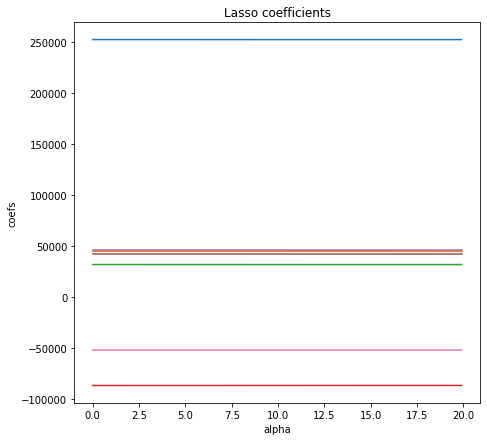

In [174]:
# Importing library for visualization
#
import matplotlib.pyplot as plt
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()



> lasso MSE: 54234316379.35559
  linear MSE: 54233703309.339386
This shows that our baseline model performed better than Lasso Reggression Model.





## Elastic Net Regression

In [175]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
# picking the indepednt variable and the label
X = df_estate.drop("price",axis=1)
y = df_estate["price"]
# Creating our linear regression model for the purpose of comparison
# 
regression=LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 

y_pred=regression.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df.head()

# This mean standard error score of 78416791.01666649 is our benchmark for determining 
# if the elastic net model will be better or worst. 

54534297012.00984


,Actual,Predicted
0,221900.0,247774.644332
1,538000.0,773562.538505
2,180000.0,256136.578522
3,604000.0,498369.284540
4,510000.0,349909.309800


In [176]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 61094.67645536026,
 'bedrooms': -54658.38968572764,
 'floors': 58121.99884536157,
 'sqft_living': 272.92774415450305,
 'view': 59116.93782671148,
 'waterfront': 546029.3934020939,
 'yr_built': -2981.9963457708}

In [177]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [178]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
55067457717.49733


In [196]:
# The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8. .
# 
elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X))) 
# How accurate the predicted values are to the observed/real results present values
print(second_model)

54789647826.72416


In [199]:
#linear regression
y_pred=regression.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted linear': y_pred})

#elastic net
y_pred1=elastic.predict(X)
df = pd.DataFrame({'Actual': y, 'Predicted elastic': y_pred1})

df1= pd.DataFrame({'Actual': y, 'Predicted_Linear': y_pred,'Predicted_Elastic': y_pred1})
df1.head()

,Actual,Predicted_Linear,Predicted_Elastic
0,221900.0,247774.644332,253739.111096
1,538000.0,773562.538505,750728.409747
2,180000.0,256136.578522,255778.986664
3,604000.0,498369.284540,515477.679920
4,510000.0,349909.309800,359151.999639


In [200]:
#Checking the central measures of tendency between linear regression and elastic net regression
df1.describe()

,Actual,Predicted_Linear,Predicted_Elastic
count,2.161000e+04,2.161000e+04,2.161000e+04
mean,5.401789e+05,5.401789e+05,5.401789e+05
std,3.673876e+05,2.836139e+05,2.725884e+05
min,7.500000e+04,-1.202212e+06,-8.536923e+05
25%,3.216125e+05,3.495548e+05,3.557442e+05
50%,4.500000e+05,4.816909e+05,4.856389e+05
75%,6.450000e+05,6.601776e+05,6.553725e+05
max,7.700000e+06,4.051695e+06,3.869585e+06


In [201]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)
 
#Coeff from elastic net.
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
print(coef_dict_baseline)

# The coefficients are mostly the same. 

{'sqft_living': 272.92774415450305, 'bathrooms': 61094.67645536026, 'floors': 58121.99884536157, 'yr_built': -2981.9963457708, 'view': 59116.93782671148, 'waterfront': 546029.3934020939, 'bedrooms': -54658.38968572764}
{'sqft_living': 247.34895473443788, 'bathrooms': 69646.83592935436, 'floors': 55127.15356506187, 'yr_built': -2747.138273550371, 'view': 63442.196086226904, 'waterfront': 534234.5279164393, 'bedrooms': -43015.90499185276}




> The Baseline model prediction MSE is 54534297012.01 while the Elastic Net Regression model MSE is 54789647826.72. This means that the Elastic Net Regression model performed poorer than the basline model.



# Recommendations

# Challenging the solution



> The Linear Regression performed better than Quantile, Ridge, Lasso and Elastic Net Regression models. This might be an indication that maybe our data had few outliers and skewness.

> Also, the models would have performed better if there were data provided on proximity to road, running water, upgrades and updates, the local market etc.





## Follow up question



> a). Did we have the right data? Yes. Our data had sufficient number of columns and rows

> b). Do we need other data to answer our questions? Yes. If we had data on other factors i.e availability of social amenities i.e swimming pool, bath tub and basic amenities i.e roads, running water



c). Did we have the right question? Yes. The price was definitely the target that we wanted to predict.

